# Neural networks work

## Question 1: Linear Regression.

Implemente um modelo de regressão linear. Para isso, utilize um conjunto de dados sintético gerado com a equação:


\[
y = 3x + 5 + epsilon 
\]

Onde:
- \(x\) segue uma distribuição uniforme entre -10 e 10.
- \(epsilon\) é um ruído gaussiano com média zero e desvio padrão de 2.

### Passos para Implementação

1. **Gere um conjunto de dados com pelo menos 100 pontos**.
2. **Divida os dados em treino (80%) e teste (20%)**.
3. **Implemente modelos de regressão linear empregando:**
    - A solução de mínimos quadrados (pseudo-inversa).
    - Uma rede neural com uma camada treinada via gradiente descendente utilizando MSE-Loss (Erro Quadrático Médio) e otimizador SGD.
4. **Apresente as soluções para cada um dos métodos acima**.
5. **Avalie o desempenho dos modelos e visualize os resultados**.


In [37]:
import os
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [38]:
# Configurar sementes para reprodutibilidade
np.random.seed(0)
torch.manual_seed(0)

In [39]:
# Função para gerar dados sintéticos
def generate_synthetic_data(N, a=3, b=5, sigma=2):
    x = np.random.uniform(-10, 10, N)
    epsilon = np.random.normal(0, sigma, N)
    y = a * x + b + epsilon
    return x, y

In [40]:
# Função para gerar dados sintéticos
def generate_synthetic_data(N, a=3, b=5, sigma=2):
    x = np.random.uniform(-10, 10, N)
    epsilon = np.random.normal(0, sigma, N)
    y = a * x + b + epsilon
    return x, y

In [41]:

# Função para normalizar os dados
def normalize_data(x_train, x_test):
    mean = x_train.mean()
    std = x_train.std()
    x_train_normalized = (x_train - mean) / std
    x_test_normalized = (x_test - mean) / std
    return x_train_normalized, x_test_normalized

In [42]:
# Função para adicionar termo de bias
def add_bias_term_torch(x):
    ones = torch.ones((x.shape[0], 1))  # Criar uma coluna de 1s
    return torch.cat((ones, x), dim=1)  # Concatenar no eixo das colunas (dim=1)

In [43]:
# Função para calcular a pseudo-inversa
def calculate_pseudo_inverse_torch(X_train, y_train):
    return torch.linalg.pinv(X_train) @ y_train  # Usa pseudo-inversa em PyTorch

In [44]:
# Função para treinar a rede neural
def train_neural_network(X_train_torch, y_train_torch, epochs=1000, lr=0.01):
    model = LinearRegressionNN()
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)
    losses = []
    for epoch in range(epochs):
        optimizer.zero_grad()
        y_pred = model(X_train_torch)
        loss = criterion(y_pred, y_train_torch)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    return model, losses

In [45]:
# Função para visualizar as perdas durante o treinamento
def plot_losses(losses):
    plt.plot(losses)
    plt.xlabel('Épocas')
    plt.ylabel('Perda')
    plt.title('Perda durante o treinamento')
    plt.grid(True)
    plt.show()

In [46]:

# Função para visualizar os resultados
def plot_results(x, y, y_pred_pinv, y_pred_nn, train_size):
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, label="Dados reais", alpha=0.6, color='blue')
    plt.plot(x[train_size:], y_pred_pinv, label="Pseudo-Inversa", color="red", linewidth=2)
    plt.plot(x[train_size:], y_pred_nn, label="Rede Neural", color="yellow", linestyle="dashed", linewidth=2)
    plt.legend()
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Regressão Linear: Pseudo-Inversa vs Rede Neural")
    plt.grid(True)
    plt.savefig("imagens/Q1-regressao_linear.png")
    plt.show()

In [47]:
# Implementação com Rede Neural
class LinearRegressionNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)  # Apenas uma camada linear

    def forward(self, x):
        return self.linear(x)


Coeficientes da regressão (Mínimos Quadrados): tensor([[ 4.7925],
        [17.3431]])


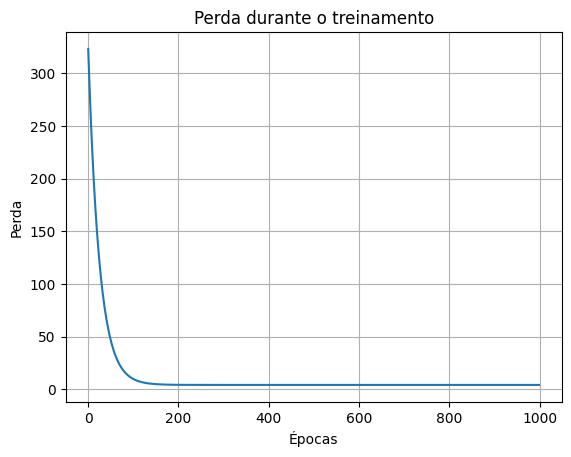

Coeficientes da Rede Neural: w = 17.34300422668457 , b = 4.792449951171875
MSE (Pseudo-Inversa): 3.6003
MSE (Rede Neural): 3.6003


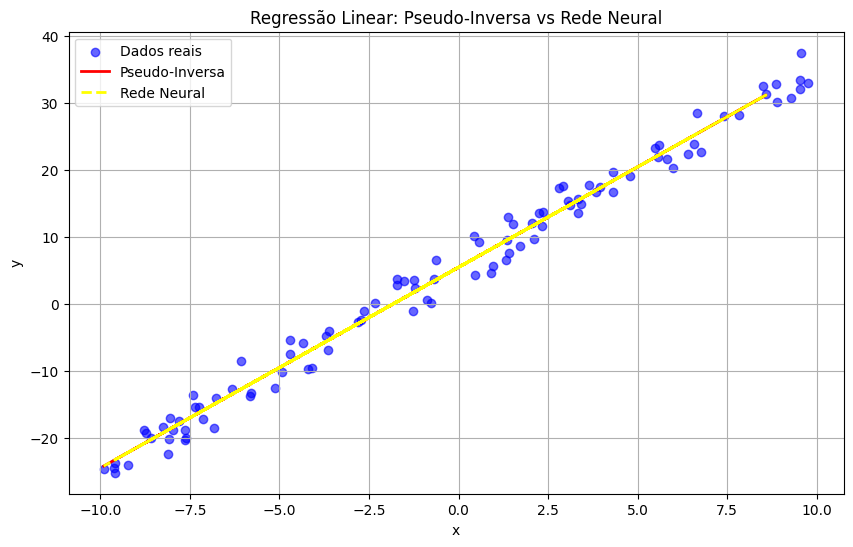

In [48]:

# Gerar dados sintéticos
N = 100
x, y = generate_synthetic_data(N)

# Dividir os dados em treino (80%) e teste (20%)
train_size = int(0.8 * N)
x_train, x_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Normalizar os dados
x_train, x_test = normalize_data(x_train, x_test)

# Adicionar termo de bias
X_train = add_bias_term_torch(torch.tensor(x_train, dtype=torch.float32).view(-1, 1))
X_test = add_bias_term_torch(torch.tensor(x_test, dtype=torch.float32).view(-1, 1))

# Regressão Linear via Pseudo-Inversa
theta = calculate_pseudo_inverse_torch(X_train, torch.tensor(y_train, dtype=torch.float32).view(-1, 1))
print("Coeficientes da regressão (Mínimos Quadrados):", theta)

# Previsões no conjunto de teste
y_pred_pinv = X_test @ theta


# Convertendo os dados para Tensores do PyTorch
X_train_torch = torch.tensor(x_train, dtype=torch.float32).view(-1, 1)
y_train_torch = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_torch = torch.tensor(x_test, dtype=torch.float32).view(-1, 1)

# Treinamento da Rede Neural
model, losses = train_neural_network(X_train_torch, y_train_torch)

# Visualizar as perdas durante o treinamento
plot_losses(losses)

# Obtendo os coeficientes treinados
w_nn, b_nn = model.linear.weight.item(), model.linear.bias.item()
print("Coeficientes da Rede Neural: w =", w_nn, ", b =", b_nn)

# Predições da Rede Neural
y_pred_nn = model(X_test_torch).detach().numpy()

# Cálculo dos Erros Médios Quadráticos (MSE)
mse_pinv = mean_squared_error(y_test, y_pred_pinv)
mse_nn = mean_squared_error(y_test, y_pred_nn)

print(f"MSE (Pseudo-Inversa): {mse_pinv:.4f}")
print(f"MSE (Rede Neural): {mse_nn:.4f}")

# Criar diretório para salvar a imagem
os.makedirs("imagens", exist_ok=True)

# Visualizar os resultados
plot_results(x, y, y_pred_pinv, y_pred_nn, train_size)



Coeficientes da regressão (Mínimos Quadrados): tensor([[ 4.2159],
        [18.4898]])


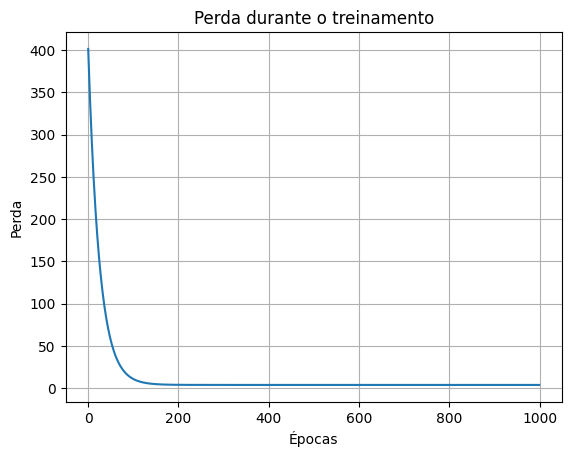

Coeficientes da Rede Neural: w = 18.489728927612305 , b = 4.215938091278076
MSE (Pseudo-Inversa): 4.3847
MSE (Rede Neural): 4.3847


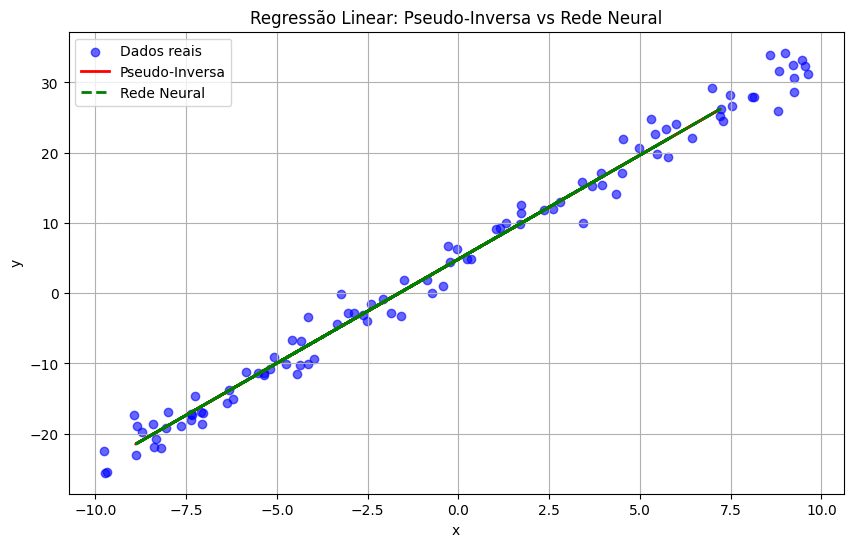